In [1]:
import os
import torch
import numpy as np
import pandas as pd

import scanpy as sc
from anndata import AnnData

In [2]:
samples=['sample1_rep1', 'sample1_rep2']
sample='sample1_rep1'#samples[7]
data_dir = "../../data/BC/processed1/"
result_dir="../edges/"
str_x='centerx'
str_y='centery'
str_cell_type='subclass'
cell_types=['B_Cells', 'CD4+_T_Cells', 'CD8+_T_Cells', 'DCIS_1', 'DCIS_2', 'Endothelial', 'IRF7+_DCs', 'Invasive_Tumor', 'LAMP3+_DCs', 'Macrophages_1', 'Macrophages_2', 'Mast_Cells', 'Myoepi_ACTA2+', 'Myoepi_KRT15+', 'Perivascular-Like', 'Prolif_Invasive_Tumor', 'Stromal', 'Stromal_&_T_Cell_Hybrid', 'T_Cell_&_Tumor_Hybrid', 'Unlabeled']
print(cell_types)

genes = torch.load("/".join(data_dir.split("/")[:-2]) + "/genes.pth")
print("GFAP" in genes,genes)
type_exp_dict=np.load(data_dir + sample + "_TypeExp.npz", allow_pickle=True)

cell_type_pair_sequence=[]
for cell_typei in cell_types:
    for cell_typej in cell_types:
        cell_type_pair_sequence.append(cell_typei+"->"+cell_typej)

feature_names=[]
for i in range(len(cell_types)):
    for j in range(len(genes)):
        feature_names.append(cell_types[i]+"--"+genes[j])
        
top_genes=['GATA3', 'CEACAM6', 'LUM', 'ANKRD30A', 'FASN', 'CXCL12', 'CCND1', 'FOXA1', 'KRT8', 'SCD', 'EPCAM', 'CCDC80', 'ERBB2', 'MMP2', 'KRT7', 'POSTN']###########['CUX2', 'CLSTN2', 'NTNG2', 'LAMP5', 'RORB', 'MOG', 'HS3ST2', 'SLIT3', 'RBFOX3', 'CD74']
gene_list = torch.load("/".join(data_dir.split("/")[:-2]) + "/genes.pth")

['B_Cells', 'CD4+_T_Cells', 'CD8+_T_Cells', 'DCIS_1', 'DCIS_2', 'Endothelial', 'IRF7+_DCs', 'Invasive_Tumor', 'LAMP3+_DCs', 'Macrophages_1', 'Macrophages_2', 'Mast_Cells', 'Myoepi_ACTA2+', 'Myoepi_KRT15+', 'Perivascular-Like', 'Prolif_Invasive_Tumor', 'Stromal', 'Stromal_&_T_Cell_Hybrid', 'T_Cell_&_Tumor_Hybrid', 'Unlabeled']
False ['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ', 'AGR3', 'AHSP', 'AIF1', 'AKR1C1', 'AKR1C3', 'ALDH1A3', 'ANGPT2', 'ANKRD28', 'ANKRD29', 'ANKRD30A', 'APOBEC3A', 'APOBEC3B', 'APOC1', 'AQP1', 'AQP3', 'AR', 'AVPR1A', 'BACE2', 'BANK1', 'BASP1', 'BTNL9', 'C15orf48', 'C1QA', 'C1QC', 'C2orf42', 'C5orf46', 'C6orf132', 'CAV1', 'CAVIN2', 'CCDC6', 'CCDC80', 'CCL20', 'CCL5', 'CCL8', 'CCND1', 'CCPG1', 'CCR7', 'CD14', 'CD163', 'CD19', 'CD1C', 'CD247', 'CD27', 'CD274', 'CD3D', 'CD3E', 'CD3G', 'CD4', 'CD68', 'CD69', 'CD79A', 'CD79B', 'CD80', 'CD83', 'CD86', 'CD8A', 'CD8B', 'CD9', 'CD93', 'CDC42EP1', 'CDH1', 'CEACAM6', 'CEACAM8', 'CENPF', 'CLCA2', 'CLDN4', '

In [3]:
cell_type_mapping = {
    'B_Cells': 'Immune Cell',
    'CD4+_T_Cells': 'Immune Cell',
    'CD8+_T_Cells': 'Immune Cell',
    'DCIS_1': 'Tumor Cell',
    'DCIS_2': 'Tumor Cell',
    'Endothelial': 'Structural Cell',
    'IRF7+_DCs': 'Immune Cell',
    'Invasive_Tumor': 'Tumor Cell',
    'LAMP3+_DCs': 'Immune Cell',
    'Macrophages_1': 'Immune Cell',
    'Macrophages_2': 'Immune Cell',
    'Mast_Cells': 'Immune Cell',
    'Myoepi_ACTA2+': 'Structural Cell',
    'Myoepi_KRT15+': 'Structural Cell',
    'Perivascular-Like': 'Structural Cell',
    'Prolif_Invasive_Tumor': 'Tumor Cell',
    'Stromal': 'Structural Cell',
    'Stromal_&_T_Cell_Hybrid': 'Immune Cell',
    'T_Cell_&_Tumor_Hybrid': 'Immune Cell',
    'Unlabeled':'Unlabeled'
}

In [3]:
def read_data(sample,idx,select=10,loss_threshold=10,normalize=False):
    results=torch.load(result_dir+"edges_"+sample+".pth",map_location=torch.device('cpu'))
    edges=results["edges"]

    # modify here
    if normalize:
        attention_score=torch.abs(results["attention_score"])/torch.sum(torch.abs(results["attention_score"]),dim=-2,keepdim=True)
    else:
        attention_score=results["attention_score"]
        normalized_attention_score=torch.abs(results["attention_score"])/torch.sum(torch.abs(results["attention_score"]),dim=-2,keepdim=True)
        
    position_x=results["position_x"]
    position_y=results["position_y"]
    cell_type_name=results["cell_type_name"]
    loss1=results["loss_all"].cpu()
    
    B,N=position_x.shape
    loss1=loss1.unsqueeze(dim=-1).repeat(1,select).reshape(-1).numpy()
    
    cell_type_target=[cell_type_name[i][0] for i in range(len(cell_type_name))]
    
    '''
    if normalize:
        indices=torch.topk(torch.sum(attention_score,dim=-1),k=select,dim=-1)[1]
        print(torch.topk(torch.mean(attention_score,dim=-1),k=select,dim=-1))
    else:
        tmp=torch.abs(results["attention_score"])/torch.sum(torch.abs(results["attention_score"]),dim=-2,keepdim=True)
        indices=torch.topk(torch.sum(tmp,dim=-1),k=select,dim=-1)[1]
        print(torch.topk(torch.mean(tmp,dim=-1),k=select,dim=-1))
    '''
    indices=torch.topk(attention_score[:,:,idx],k=select,dim=-1)[1]

    indices_tmp=torch.arange(0,indices.shape[0],1).unsqueeze(dim=-1).repeat(1,select)
    indices=torch.stack([indices_tmp.reshape(-1),indices.reshape(-1)],dim=0)

    if not use_edge:
        edge=attention_score
    edges=edge[indices[0],indices[1],:].reshape(-1,edge.shape[-1]).numpy()
    
    to_position_x=position_x[:,0:1].repeat(1,select).reshape(-1).numpy()
    to_position_y=position_y[:,0:1].repeat(1,select).reshape(-1).numpy()
    from_position_x=position_x[:,1:][indices[0],indices[1]].reshape(-1).numpy()
    from_position_y=position_y[:,1:][indices[0],indices[1]].reshape(-1).numpy()
    
    dx=position_x-position_x[:,0:1]
    dy=position_y-position_y[:,0:1]
    distances=torch.sqrt(torch.square(dx)+torch.square(dy))
    distances=distances[indices[0],indices[1]].reshape(-1).numpy()
    
    indices_np=indices.numpy()
    cell_types=np.array(cell_type_name)[:,1:][indices_np[0],indices_np[1]].reshape(B,select)
    cell_types_pair=[]
    flags=[]
    for i in range(cell_types.shape[0]):
        for j in range(cell_types.shape[1]):
            if not raw_type:
                cell_types_pair.append(cell_types[i][j]+"__"+cell_type_target[i])
                flags.append(cell_type_target[i]!=cell_types[i][j])
            else:
                cell_types_pair.append(cell_types[i][j].split(" ")[0]+"__"+cell_type_target[i].split(" ")[0])
                flags.append(cell_types[i][j].split(" ")[0]!=cell_type_target[i].split(" ")[0])
    print(edges.shape)
    adata = AnnData(edges)
    adata.obs['cell_type'] = cell_types_pair
    adata.obs['from_position_x'] = from_position_x
    adata.obs['from_position_y'] = from_position_y
    adata.obs['to_position_x'] = to_position_x
    adata.obs['to_position_y'] = to_position_y
    adata.obs['distance']=distances
    adata.obs['loss']=loss1
    
    adata=adata[(adata.obs['loss']<loss_threshold)&flags,:]
    return adata

def plot(adata,color='cell_type',select_type_number=None,select_type=None):
    assert not ((select_type is None and select_type_number is None) and (select_type is not None and select_type_number is not None))
    
    if select_type_number is not None:
        unique=np.unique(adata.obs['cell_type'],return_counts=True)
        args = np.argsort(-unique[1])[:select_type_number]
        select_type = unique[0][args]
    print("selecting edge types:", select_type)
    
    flag=[adata.obs['cell_type'][i] in select_type for i in range(adata.shape[0])]
    adata_filtered=adata[flag,:]
    
    sc.tl.pca(adata_filtered, n_comps=10)
    sc.pp.neighbors(adata_filtered)  # Compute the neighborhood graph
    sc.tl.umap(adata_filtered)  # Compute UMAP
    # Plot UMAP
    sc.pl.umap(adata_filtered, color=color)
    return adata

#adata=read_data('mouse1_slice201',select=5)
#print(adata)

In [4]:
def load_sample_position(sample,add_column=True):
    df = pd.read_csv(data_dir+sample+".csv")
    # Step 1: Create a new column based on conditions
    df['cell_type_plot'] = df[str_cell_type].apply(
        lambda x: cell_type_mapping[x]
    )
    #df=df[df['cell_type_plot']!="Not_excitatory_neuron"]
    return df

df_position=load_sample_position(sample)

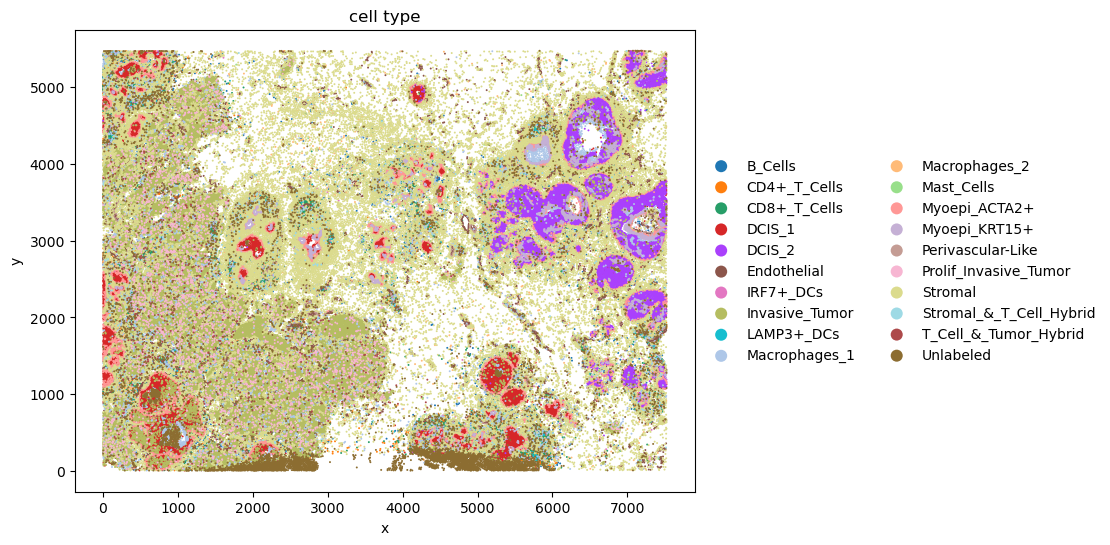

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import matplotlib as mpl

# Set the colormap using rcParams
color_map=None
mpl.rcParams['image.cmap'] = 'plasma'

def plot_type(df):
    """
    Plots a scatter plot for a DataFrame with discrete 'loss_all' values.

    Parameters:
    df (DataFrame): Pandas DataFrame with columns 'loss_all', 'position_x', 'position_y'
    """
    adata=AnnData(X=np.zeros((df.shape[0],3)))
    adata.obs["x"]=df["centerx"].values
    adata.obs["y"]=df["centery"].values
    #adata.obs['generalized_ct']=df['generalized_ct'].values
    adata.obs["cell_type"]=df['subclass'].values
    fig, ax = plt.subplots(figsize=(8, 6))
    sc.pl.scatter(
        adata,
        x='x',#'position_x',
        y='y',#'position_y',
        color="cell_type",ax=ax,size=8#,palette='Set1',
    )
    '''
    # Create the scatter plot
    #plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(data=df, x="CenterX_global_px", y="CenterY_global_px", hue='generalized_ct', legend='full')#'generalized_ct'#"CellType"

    # Customizing the plot
    plt.title('Discrete Loss Visualization According to Position')
    plt.xlabel('Position X')
    plt.ylabel('Position Y')
    plt.legend(title='Cell_type')

    # Display the plot
    plt.show()
    '''

plot_type(df_position)

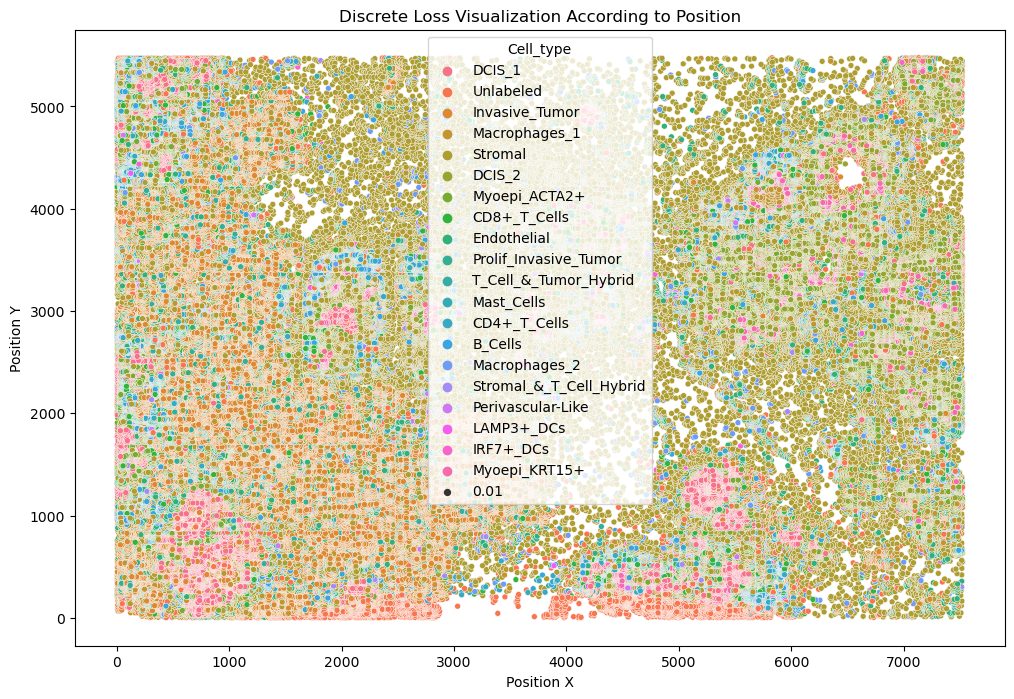

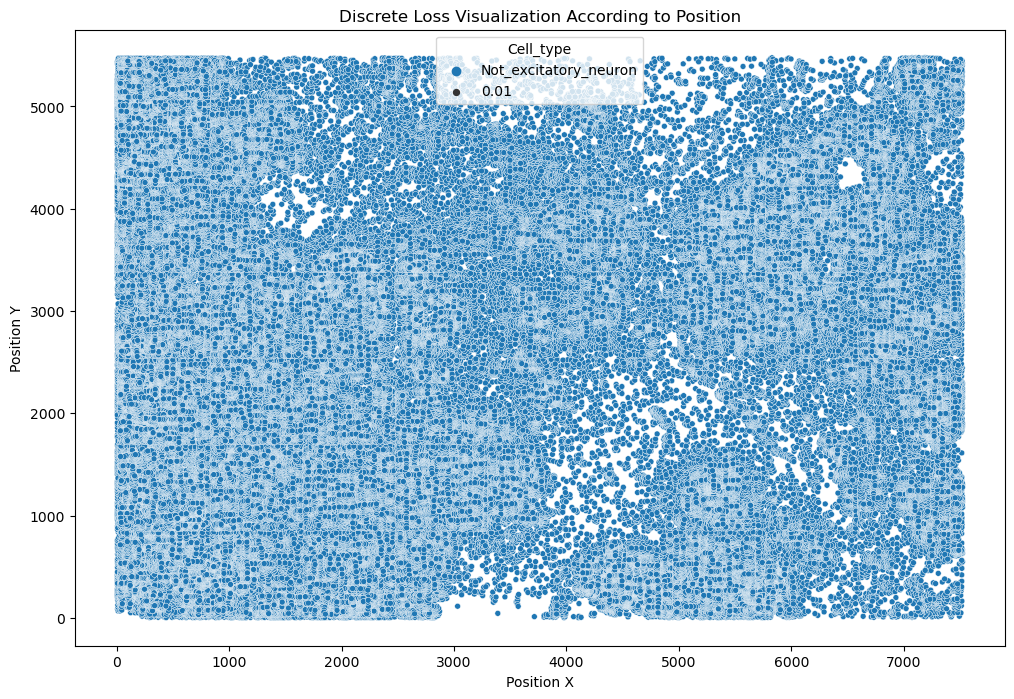

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.lines as mlines

def plot_type(df,use_plot=False):
    """
    Plots a scatter plot for a DataFrame with discrete 'loss_all' values.

    Parameters:
    df (DataFrame): Pandas DataFrame with columns 'loss_all', 'position_x', 'position_y'
    """

    # Create the scatter plot
    plt.figure(figsize=(12, 8))
    if use_plot:
        scatter = sns.scatterplot(data=df, x='centerx', y='centery', hue='cell_type_plot', legend='full',size=0.01)#
    else:
        scatter = sns.scatterplot(data=df, x='centerx', y='centery', hue='subclass', legend='full',size=0.01)#'subclass'

    # Customizing the plot
    plt.title('Discrete Loss Visualization According to Position')
    plt.xlabel('Position X')
    plt.ylabel('Position Y')
    plt.legend(title='Cell_type')

    # Display the plot
    plt.show()

plot_type(df_position,False)
plot_type(df_position,True)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
def plot_info_flow(sample,df_position,idx,title,cutoff=0.05,cutoff_type="percentage",select=5):
    adata=read_data(sample,idx,select=select)
    from_x = adata.obs['from_position_x']
    from_y = adata.obs['from_position_y']
    to_x = adata.obs['to_position_x']
    to_y = adata.obs['to_position_y']
    values = adata.X[:, idx]

    flag = [values[i] >= cutoff for i in range(values.shape[0])]
    if cutoff_type=="percentage":
        retain_number=int(values.shape[0]*cutoff)
        args=np.argsort(-values)[:retain_number]
        flag=[i for i in range(values.shape[0]) if i in args.tolist()]
    from_x = from_x[flag]
    from_y = from_y[flag]
    to_x = to_x[flag]
    to_y = to_y[flag]
    values = values[flag]

    # Calculate differences for arrow directions
    dx = to_x - from_x
    dy = to_y - from_y

    # Normalize the values for coloring
    norm = plt.Normalize(values.min(), values.max())

    # Create a colormap
    cmap = plt.cm.jet

    # Create a figure
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Plotting the arrows using quiver
    scatter = sns.scatterplot(data=df_position, x=str_x, y=str_y, hue='cell_type', legend='full',ax=ax,size=0.01)
    quiver = ax.quiver(from_x, from_y, dx, dy, values, angles='xy', scale_units='xy', scale=1, cmap=cmap, norm=norm)
    
    # Set the x and y axis limits
    min_x_value=min(np.min(adata.obs['from_position_x']),np.min(adata.obs['to_position_x']))
    min_y_value=min(np.min(adata.obs['from_position_y']),np.min(adata.obs['to_position_y']))
    max_x_value=max(np.max(adata.obs['from_position_x']),np.max(adata.obs['to_position_x']))
    max_y_value=max(np.max(adata.obs['from_position_y']),np.max(adata.obs['to_position_y']))
    ax.set_xlim([min_x_value, max_x_value])  # Replace with your desired limits
    ax.set_ylim([min_y_value, max_y_value])  # Replace with your desired limits
    
    # Show color bar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax)

    # Show the plot
    plt.title(title)
    plt.show()


#plot_info_flow_target_gene(sample='mouse1_slice201',target_gene='Reln',cutoff=0.2,select_number=5, select_type=10, exclude_same=True, selected_edge_types=None)

(796120, 321)


/tmp/ipykernel_3517608/4075740587.py:72: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  adata=adata[(adata.obs['loss']<loss_threshold)&flags,:]
/tmp/ipykernel_3517608/883178592.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  from_x = from_x[flag]
/tmp/ipykernel_3517608/883178592.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  from_y = from_y[flag]
/tmp/ipykernel_3517608/883178592.py:18: FutureWarning: Series.__getitem__ t

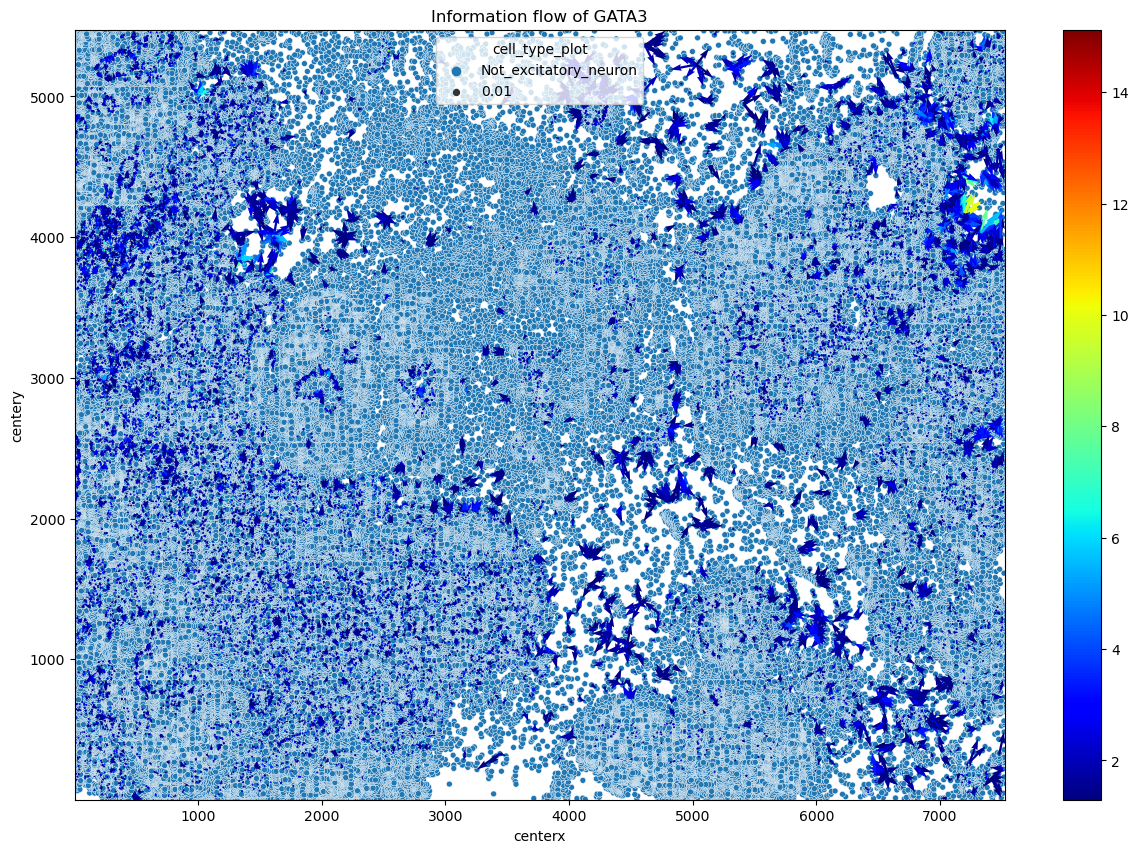

(796120, 321)


/tmp/ipykernel_3517608/4075740587.py:72: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  adata=adata[(adata.obs['loss']<loss_threshold)&flags,:]
/tmp/ipykernel_3517608/883178592.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  from_x = from_x[flag]
/tmp/ipykernel_3517608/883178592.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  from_y = from_y[flag]
/tmp/ipykernel_3517608/883178592.py:18: FutureWarning: Series.__getitem__ t

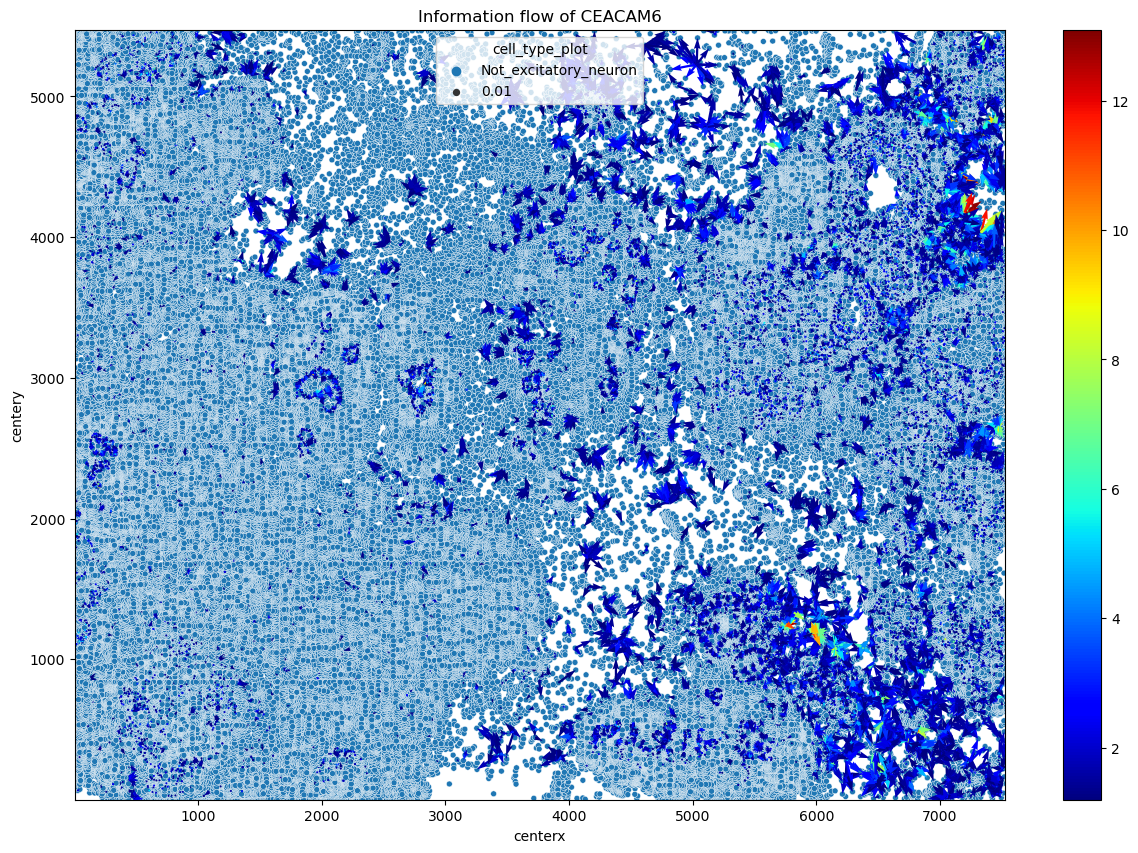

(796120, 321)


/tmp/ipykernel_3517608/4075740587.py:72: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  adata=adata[(adata.obs['loss']<loss_threshold)&flags,:]


KeyboardInterrupt: 

In [13]:
use_edge=False
raw_type=False
for genei in top_genes:
    plot_info_flow(sample=sample,df_position=df_position,idx=gene_list.index(genei),cutoff=0.05,title="Information flow of "+genei)